In [35]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gravity_functions as grav

%matplotlib inline

In [2]:
#Useful constants
G = 6.67430*10**-11
Ms = 1.98847*10**30
Me = 5.972*10**24
Mm = 7.348*10**22
r_se = 1.5*10**11

We'll first consider a simplified version of the gravitational system consisting of the Earth and the sun.  At first we'll assume that the Earth is  on a circular orbit around the sun. Naively, we also assume that the sun is stationary (since $M_s>>M_e$), and initialize the earth with velocity given by

\begin{equation}
v = \sqrt{\frac{GM_s}{r}}\;\;\;\;\;\;\;\;\;\;(1)
\end{equation}

Here, $r$ is the distance between the earth and the sun, which we will take to be $r = 1.5\times 10^{11}$ m.

Text(0, 0.5, 'Distance between masses (m)')

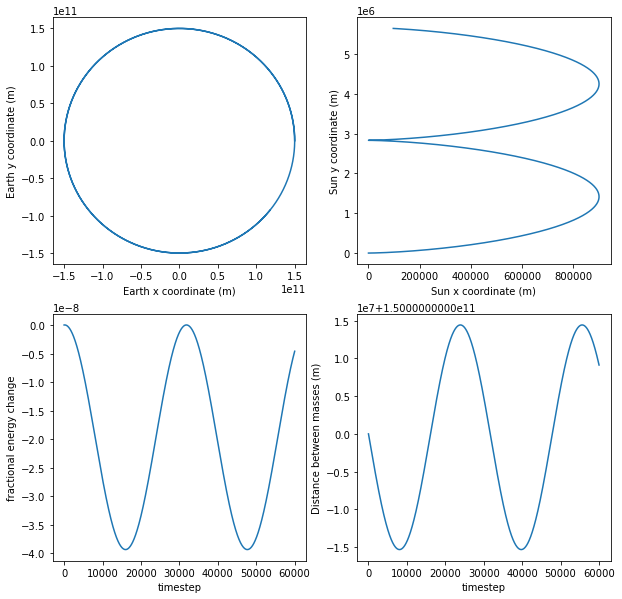

In [3]:
masses = np.array([Ms, Me]) #mass of sun and earth in kg
### inital positions ###
X = np.array([0.0,r_se])
Y = np.array([0.0,0.0])
Z = np.array([0.0,0.0])
v_circ = np.sqrt(G*masses[0]/X[1]) #circular orbit velocity
### initial velocities ###
Vx = np.array([0.0,0.0])
Vy = np.array([0.0, v_circ])
Vz = np.array([0.0,0.0])

N = X.size #number of masses
dt = 1000 #timestep (seconds)
steps = 60000 #number of timesteps

### 'pos' array holds all positions at all times ###
### index 0: timestep, index 1: X, Y, or Z, index 2: mass index ###
pos = np.empty([steps, 3, N]) 
pos[0,0,:] = X
pos[0,1,:] = Y
pos[0,2,:] = Z

### 'vel' array holds current velcoities ###
### index 0: Vx, Vy, or Vz, index 1: mass index ###
vel = np.array([Vx,Vy,Vz])

fig, axs = plt.subplots(2,2,figsize = (10,10))
pos_list, en_list = grav.evolve(pos,vel, masses, N,steps, dt)
axs[0,0].plot(pos_list[:,0, 1], pos_list[:,1,1])
axs[0,0].set_xlabel('Earth x coordinate (m)')
axs[0,0].set_ylabel('Earth y coordinate (m)')
axs[0,1].plot(pos_list[:,0, 0], pos_list[:,1,0])
axs[0,1].set_xlabel('Sun x coordinate (m)')
axs[0,1].set_ylabel('Sun y coordinate (m)')
axs[1,0].plot(np.linspace(0,steps, steps), (en_list-en_list[0])/en_list[0])
axs[1,0].set_xlabel('timestep')
axs[1,0].set_ylabel('fractional energy change')
axs[1,1].plot(np.linspace(0,steps, steps), np.sqrt((pos_list[:,0, 1]-pos_list[:,0, 0])**2 + (pos_list[:,1, 1]-pos_list[:,1, 0])**2))
axs[1,1].set_xlabel('timestep')
axs[1,1].set_ylabel('Distance between masses (m)')

In the above plots, we see the the Earth follows a nearly circular orbit, while the Sun follows a more complicated path.  Note that even though we assumed that the sun was stationary, the 'evolve' function calculates the gravitational force on each mass and evolves its position accordingly, so the sun does move, although much more slowly than the Earth.  We also plot the fractional energy change of the gravitational system versus time and the distamce between the masses versus time.  We'd like to analyze the system more carefully in the center of mass frame.

When analyzing the two-body gravitation problem, it is common to use the center of mass $\vec{R}$ of the system and the displacement vector $\vec{r}$ between the two bodies as the (six) generalized coordinates.  Mathematically, if $m_1$ and $m_2$ are located at $\vec{r}_1$ and $\vec{r}_2$, respectively, then we have $\vec{R} = \frac{m_1\vec{r}_1+m_2\vec{r}_2}{M}$ and $\vec{r} = \vec{r}_1-\vec{r}_2$, where $M = m_1+m_2$.  If we shift to the center of mass frame, in which $\vec{R}=0$ for all times, then we can then express the position vectors of the bodies as

\begin{equation}
\vec{r}_1 = \frac{m_2}{M}\vec{r}\;\;\;\;\;\;\;\;\;\;\vec{r}_2 = -\frac{m_1}{M}\vec{r}\;\;\;\;\;\;\;(2)
\end{equation}

In the example below, we consider 2-body systems with circular orbits. In other words, both masses orbit the center of mass system along circular trajectories so that the separation between the masses is constant.  The only parameters which need to be specified are the masses and the radial separation between the masses.  First, we assign the initial coordinates to the masses along the x-axis, using Eq. (1).  It is known (Taylor), that the radial separation between the two masses as a function of the orbital angle $\phi$ is

\begin{equation}
r(\phi) = \frac{l^2}{Gm_1m_2\mu(1+\epsilon\cos\phi)}\;\;\;\;\;\;\;(3)
\end{equation}

Here, $l$ is the angular momentum defined as $l = \mu r^2\dot{\phi}$ and $\epsilon$ is the eccentricity.  For circular orbits, $\epsilon=0$ and the angular momentum $l$ is a function of $r$ which is easily evaluated.  In turn, $\dot{\phi}$ can be calculated and the relative velocity of the masses is $v_{rel} = r\dot\phi$. 

\begin{equation}
l = \sqrt{Gm_1m_2\mu r}\rightarrow \dot{\phi} = \sqrt{\frac{Gm_1m_2}{\mu r^3}} \rightarrow v_{rel} = \sqrt{\frac{G(m_1+m_2)}{ r}}\;\;\;\;\;\;\;(4)
\end{equation}

Since this simulation requires the  initial velocities of the masses to be specified, we must carry out one more step to extract the individual velocities from $\dot{\phi}$.  This requires a system of two eqautions, one of which expresses $\dot{\phi}$ in terms of $\vec{v}_1, \vec{v}_2$, and one of which enforces momemtum conservation (recall we are in the center of mass frame).  Since the initial positions are on the x-axis, the initial velocities can be chosen to be in the y-direction.

\begin{cases}
\dot{\phi} = (v_2-v_1)/r \\
m_1v_1 + m_2v_2 = 0 \;\;\;\;\;\;\;\;\;\;(5)\\
\end{cases}

Solving this, we find

\begin{equation}
v_2 = \Big(\frac{m_1}{M}\Big)r\dot{\phi}\;\;\;\;\;\;\;v_1 = -\Big(\frac{m_2}{M}\Big)r\dot{\phi}\;\;\;\;\;\;\;\;\;\;(6)
\end{equation}

Having solved for the initial parameters for circular orbits, we run the simulation.  The masses and separation can be altered and the other parameters will be calculates to ensure a circular orbit.  Feel free to change the first two lines of the next cell to see this.



Text(0, 0.5, 'Distance between masses (m)')

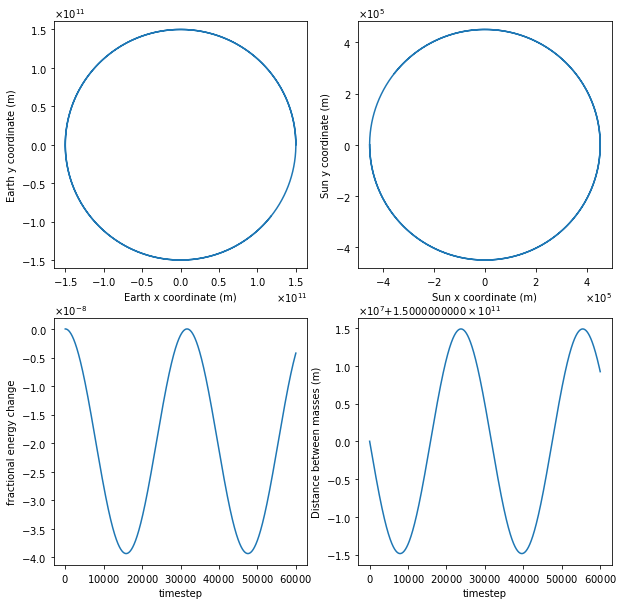

In [4]:
m = np.array([Ms, Me]) #masses in kg 

mu = m[0]*m[1]/(m[0]+m[1]) #reduced mass
X = np.array([-m[1]/(m[0]+m[1])*r_se, m[0]/(m[0]+m[1])*r_se])  #coordinates calculated from eq (2)
Y = np.array([0.0,0.0])
Z = np.array([0.0,0.0])

l_circ = (G*m[0]*m[1]*mu*r_se)**0.5  #angular momentum from solving eq (3) for l
phi_dot = l_circ / (mu*r_se**2)  #angular velocity
Vx = np.array([0.0,0.0])
Vy = np.array([-m[1]/(m[0]+m[1])*r_se*phi_dot,+m[0]/(m[1]+m[0])*r_se*phi_dot]) #initial velocities from eq (6)
Vz = np.array([0.0,0.0])

N = X.size
dt = 1000
steps = 60000
pos = np.empty([steps, 3, N]) #index 0 = timestep, index 1 = X, Y, or Z, index 2 = particle
pos[0,0,:] = X
pos[0,1,:] = Y
pos[0,2,:] = Z
vel = np.array([Vx,Vy,Vz])

fig, axs = plt.subplots(2,2,figsize = (10,10))
pos_list, en_list = grav.evolve(pos,vel, masses, N,steps, dt)
axs[0,0].ticklabel_format(useMathText=True)
axs[0,1].ticklabel_format(useMathText=True)
axs[1,0].ticklabel_format(useMathText=True)
axs[1,1].ticklabel_format(useMathText=True)
axs[0,0].axis('equal')
axs[0,1].axis('equal')
axs[0,0].plot(pos_list[:,0, 1], pos_list[:,1,1])
axs[0,0].set_xlabel('Earth x coordinate (m)')
axs[0,0].set_ylabel('Earth y coordinate (m)')
axs[0,1].ticklabel_format(axis='both', style='sci', scilimits=(0,0))
axs[0,1].plot(pos_list[:,0, 0], pos_list[:,1,0])
axs[0,1].set_xlabel('Sun x coordinate (m)')
axs[0,1].set_ylabel('Sun y coordinate (m)')
axs[1,0].plot(np.linspace(0,steps, steps), (en_list-en_list[0])/en_list[0])
axs[1,0].set_xlabel('timestep')
axs[1,0].set_ylabel('fractional energy change')
axs[1,1].plot(np.linspace(0,steps, steps), np.sqrt((pos_list[:,0, 1]-pos_list[:,0, 0])**2 + (pos_list[:,1, 1]-pos_list[:,1, 0])**2))
axs[1,1].set_xlabel('timestep')
axs[1,1].set_ylabel('Distance between masses (m)')

We see that once again, energy is conserved to within a negligible fractional change and the distance between the sun and the earth is also conserved, as we expect with the parameters we used.  These are good checks that our simulation is reproducing known results.  Note that the error amplitude decreases as we decrease the step size.  Next, we can animate the position arrays of the two masses to visualize the orbit.

<IPython.core.display.Javascript object>


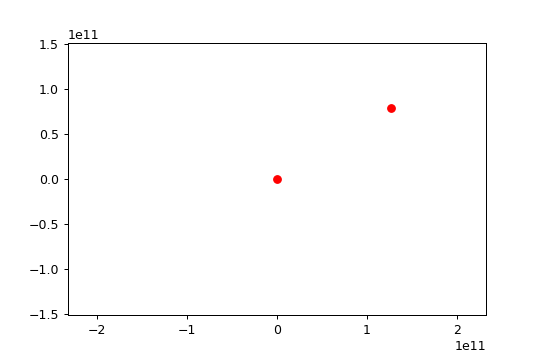

In [5]:
%matplotlib notebook

ani_speed = 50

fig, ax = plt.subplots()
line, = plt.plot(pos_list[0,0, :], pos_list[0,1,:], 'ro')
ax.axis('equal')
ax.set_ylim(-3e11, 3e11)
ax.set_xlim(-3e11, 3e11)

def update(i):
    line.set_data(pos_list[ani_speed*i,0, :], pos_list[ani_speed*i,1, :])
    #return line,

ani = animation.FuncAnimation(fig, update, interval=1)
plt.show()

Next, let's consider elliptical orbits, which occur when $0 <\epsilon < 1$.  From equation (2), we see the the ellipse will have minimum value (perihelion) and maximum value (aphelion) given by

\begin{equation}
r_{min} = \frac{l^2}{Gm_1m_2\mu(1+\epsilon)}\;\;\;\;\;\;\;\;\;\;r_{max}=\frac{l^2}{Gm_1m_2\mu(1-\epsilon)}\;\;\;\;\;\;\;\;\;\;(7)
\end{equation}

As before, we would like to specify the starting distance between the two masses and then have the angular mometum calculated by the code.  In this case, we also have to specify the eccentricity of the orbit.  For simplicity we will assume that the orbit starts at aphelion in this script.  As in the case of the circular orbit, we sovle for the parameters by evaluating

\begin{equation}
l = \sqrt{Gm_1m_2\mu(1-\epsilon) r_{max}}\rightarrow \dot{\phi} = \sqrt{\frac{Gm_1m_2(1-\epsilon)}{\mu r_{max}^3}} \rightarrow v_{rel} = \sqrt{\frac{G(m_1+m_2)(1-\epsilon)}{ r}}\;\;\;\;\;\;\;(8)
\end{equation}

(Many of the remaining cells take a minute or two to run)

Text(0, 0.5, 'Distance between masses (m)')

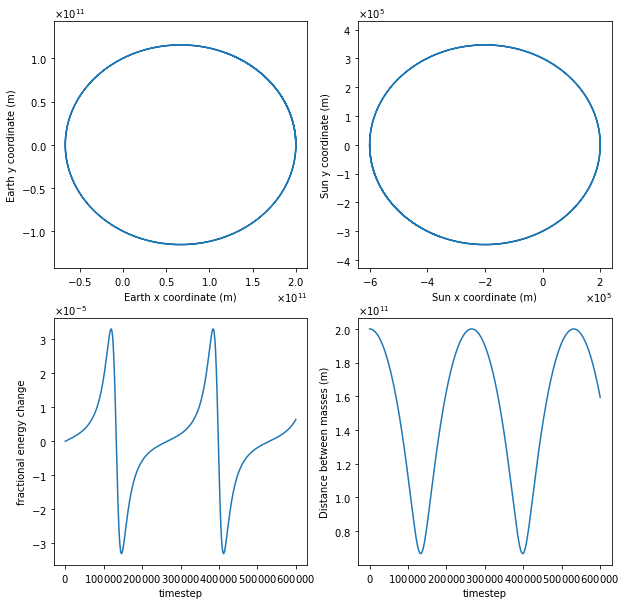

In [6]:
%matplotlib inline

ecc = 0.5 #eccentricity
m = np.array([Ms, Me]) #masses in kg 
r_ap = 2.0*10**11 #starting (aphelion) distance between the Sun and Earth

mu = m[0]*m[1]/(m[0]+m[1]) #reduced mass
X = np.array([-m[1]/(m[0]+m[1])*r_ap, m[0]/(m[0]+m[1])*r_ap])  #coordinates calculated from eq (2)
Y = np.array([0.0,0.0])
Z = np.array([0.0,0.0])

l_ell = (G*m[0]*m[1]*mu*(1-ecc)*r_ap)**0.5  #angular momentum from solving eq (3) for l
phi_dot = l_ell / (mu*r_ap**2)  #angular velocity
Vx = np.array([0.0,0.0])
Vy = np.array([-m[1]/(m[0]+m[1])*r_ap*phi_dot,+m[0]/(m[1]+m[0])*r_ap*phi_dot]) #initial velocities from eq (6)
Vz = np.array([0.0,0.0])

N = X.size
dt = 100
steps = 600000
pos = np.empty([steps, 3, N]) #index 0 = timestep, index 1 = X, Y, or Z, index 2 = particle
pos[0,0,:] = X
pos[0,1,:] = Y
pos[0,2,:] = Z
vel = np.array([Vx,Vy,Vz])

fig, axs = plt.subplots(2,2,figsize = (10,10))
pos_list, en_list = grav.evolve(pos,vel, m, N,steps, dt)
axs[0,0].ticklabel_format(useMathText=True)
axs[0,1].ticklabel_format(useMathText=True)
axs[1,0].ticklabel_format(useMathText=True)
axs[1,1].ticklabel_format(useMathText=True)
axs[0,0].axis('equal')
axs[0,1].axis('equal')
axs[0,0].plot(pos_list[:,0, 1], pos_list[:,1,1])
axs[0,0].set_xlabel('Earth x coordinate (m)')
axs[0,0].set_ylabel('Earth y coordinate (m)')
axs[0,1].ticklabel_format(axis='both', style='sci', scilimits=(0,0))
axs[0,1].plot(pos_list[:,0, 0], pos_list[:,1,0])
axs[0,1].set_xlabel('Sun x coordinate (m)')
axs[0,1].set_ylabel('Sun y coordinate (m)')
axs[1,0].plot(np.linspace(0,steps, steps), (en_list-en_list[0])/en_list[0])
axs[1,0].set_xlabel('timestep')
axs[1,0].set_ylabel('fractional energy change')
axs[1,1].plot(np.linspace(0,steps, steps), np.sqrt((pos_list[:,0, 1]-pos_list[:,0, 0])**2 + (pos_list[:,1, 1]-pos_list[:,1, 0])**2))
axs[1,1].set_xlabel('timestep')
axs[1,1].set_ylabel('Distance between masses (m)')

The fracional energy change is larger in this case, but it is still very small and centered around zero.  I decreased the step size for this reason.  A good test at this point is to see what the simulated perihelion distance is.  In the next cell we calculate the expected value using eq () as well as the simulated value. The error is negligible.

In [8]:
### calculate expected perihelion ###
per_exp = l_ell**2/(G*Ms*Me*mu*(1+ecc))
print("Expected perihelion (m): " + str("{:e}".format(per_exp)))

### simulated perihelion ###
per_sim = np.amin(np.sqrt((pos_list[:,0, 1]-pos_list[:,0, 0])**2 + (pos_list[:,1, 1]-pos_list[:,1, 0])**2))
print("Simulated perihelion (m): " + str("{:e}".format(per_sim)))

print("Perihelion error (%): " + str(100*(per_sim-per_exp)/per_exp))

Expected perihelion (m): 6.666667e+10
Simulated perihelion (m): 6.666667e+10
Perihelion error (%): 9.138488388061524e-08


The real benefit of having an N-body gravitational code like this one is in simulating more complicated gravitational systems.  Even for systems consisting of three masses, analytical solutions do not generally exist, so simulation is the best alternative.  There is an intersting class of N-body gravitational systems sometimes referred to as "choreographies", in which all of the masses traverse the same periodic trajectory.  A famous example is the three-body figure eight trajectory, which was discovered in the last 25 years.  It is a difficult mathematical problem to prove the existence of such a solution, the numerical values for the initial conditions of the three equal mass bodies is found in Simo's paper [1].  We are able to reproduce the figure-eight, which is a good check on our code for $N>2$, and also a great illustration of a very simple result which was only discovered very recently!

[1] Simó, C. (2001). New Families of Solutions in N-Body Problems. In: Casacuberta, C., Miró-Roig, R.M., Verdera, J., Xambó-Descamps, S. (eds) European Congress of Mathematics. Progress in Mathematics, vol 201. Birkhäuser, Basel. https://doi.org/10.1007/978-3-0348-8268-2_6

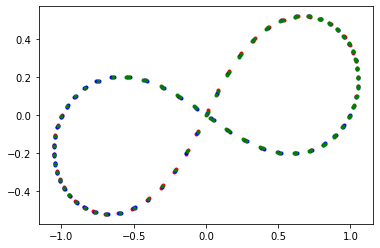

In [17]:
%matplotlib inline

m = np.array([1, 1, 1]) #masses in kg 

X = np.array([-0.995492, 0.995492, 0.0])  #coordinates from [1]
Y = np.array([0.0,0.0,0.0])
Z = np.array([0.0,0.0, 0.0])

Vx = np.array([-0.695804/2,-0.695804/2,0.695804])
Vy = np.array([-1.067860/2,-1.067860/2,1.067860]) #velocities from [1]
Vz = np.array([0.0,0.0,0.0])

N = X.size
dt = 0.0001
steps = 100000
pos = np.empty([steps, 3, N]) #index 0 = timestep, index 1 = X, Y, or Z, index 2 = particle
pos[0,0,:] = X
pos[0,1,:] = Y
pos[0,2,:] = Z
vel = np.array([Vx,Vy,Vz])

pos_list, en_list = grav.evolve(pos,vel, m, N,steps, dt, G=1)
plt.plot(pos_list[::1000,0, 0],pos_list[::1000,1,0], 'r.', linestyle = ' ')
plt.plot(pos_list[::1000,0, 1],pos_list[::1000,1,1], 'b.', linestyle = ' ')
plt.plot(pos_list[::1000,0, 2],pos_list[::1000,1,2], 'g.', linestyle = ' ')

Animating the motion of the particles,

<IPython.core.display.Javascript object>


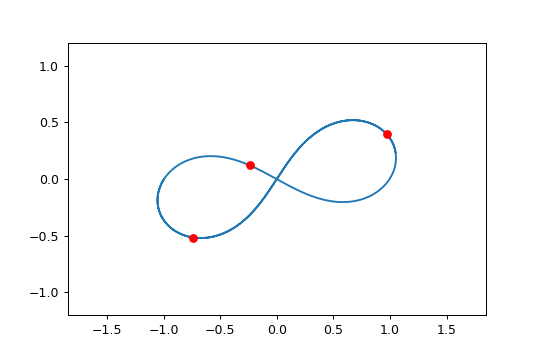

In [18]:
%matplotlib notebook

ani_speed = 50

fig, ax = plt.subplots()
plt.plot(pos_list[:,0, 0],pos_list[:,1,0])
line, = plt.plot(pos_list[0,0, :], pos_list[0,1,:], 'ro')
ax.axis('equal')
ax.set_ylim(-1.2, 1.2)
ax.set_xlim(-0.6, 0.6)

def update(i):
    line.set_data(pos_list[ani_speed*i,0, :], pos_list[ani_speed*i,1, :])
    #return line,

ani = animation.FuncAnimation(fig, update, interval=1)
plt.show()

Now that we've explored basic gravitational systems and performed many checks on the code, we'll return to the Earth-Sun gravitational system, but add more complexity.  First we will add the moon to the graviational system.  The orbital parameters used for the earth and the moon are taken from the NASA website.  We assume both orbits begin at aphelion and take into account the inclination angle of the moon's orbit.  Furthermore, we work in the center of mass frame and we calculate the sun's initial momentum using the initial momentum of the earth and moon.

In [26]:
%matplotlib inline

m = np.array([Ms, Me, Mm]) #masses in kg 
r_ap_e = 1.521*10**11 #starting (aphelion) distance between the Sun and Earth
r_ap_m = 0.4055*10**9 #starting (aphelion) distance between the Moon and Earth
ang_in  = 5.145*2*np.pi/180 #inclination angle of moon's orbit around earth 
v_e = 29.29*10**3 #minimum orbital velocity of earth around sun
v_m = 0.970*10**3 + v_e #minimum orbital velocity of moon around earth plus the velcoity of earth
v_s = (Me*v_e + Mm*v_m)/Ms #initial velcocity of sun such that total momentum is zero

X = np.array([0.0,r_ap_e,r_ap_e+r_ap_m*np.cos(ang_in)])  
Y = np.array([0.0,0.0,0.0])
Z = np.array([0.0,0.0, r_ap_m*np.sin(ang_in)]) #moon has a non-zero z cooridnate due to inclination angle

Vx = np.array([0.0,0.0,0.0])
Vy = np.array([-v_s,v_e, v_m]) 
Vz = np.array([0.0,0.0,0.0])

N = X.size
dt = 1000
steps = 100000
pos = np.empty([steps, 3, N]) #index 0 = timestep, index 1 = X, Y, or Z, index 2 = particle
pos[0,0,:] = X
pos[0,1,:] = Y
pos[0,2,:] = Z
vel = np.array([Vx,Vy,Vz])

pos_list, en_list = grav.evolve(pos,vel, m, N,steps, dt)

<IPython.core.display.Javascript object>


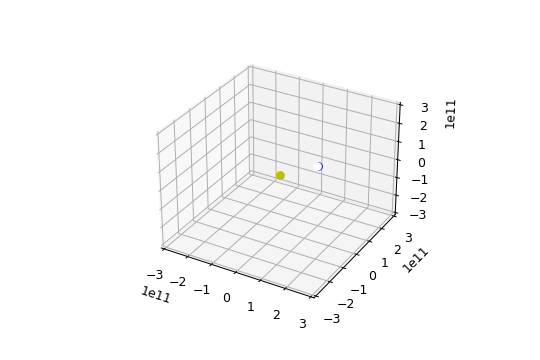

In [27]:
%matplotlib notebook

ani_speed = 50

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
line0, = ax.plot(pos_list[0,0,0], pos_list[0,1,0], pos_list[0,2,0], 'yo')
line1, = ax.plot(pos_list[0,0,1], pos_list[0,1,1], pos_list[0,2,1], 'bo')
line2, = ax.plot(pos_list[0,0,2], pos_list[0,1,2], pos_list[0,2,2], 'wo')
ax.set_ylim(-3e11, 3e11)
ax.set_xlim(-3e11, 3e11)
ax.set_zlim(-3e11, 3e11)

def update(i):
    line0.set_data(pos_list[ani_speed*i,0, 0], pos_list[ani_speed*i,1, 0])    
    line0.set_3d_properties(pos_list[ani_speed*i,2, 0]) 
    line1.set_data(pos_list[ani_speed*i,0, 1], pos_list[ani_speed*i,1, 1])    
    line1.set_3d_properties(pos_list[ani_speed*i,2, 1]) 
    line2.set_data(pos_list[ani_speed*i,0, 2], pos_list[ani_speed*i,1, 2])    
    line2.set_3d_properties(pos_list[ani_speed*i,2, 2]) 
    #return line,

ani = animation.FuncAnimation(fig, update, interval=1)
plt.show()

This simulation isn't very enlightening, but one question we could ask is: How much farther from the earth would the moon have to be in order for it to no longer orbit the earth?  In other words, how much would its potential energy need to increase for its motion to become largely independent of Earth?  We can run the simulation again for different values of 'r_ap_m' to get an answer.  We can only get an approximate value since our initial conditions are somewhat arbitrary (we assume that the Earth is at its aphelion position around the sun and that the moon is at its aphelion position around the Earth at t=0).  Running the simulation, we see that if the moon were to start only a factor of 1.35 of its actual aphelion distance from the Earth, it would begin to orbit the sun largely independent from the Earth.  To see this, simply multiply 'r_ap_m' by 1.35 and run the previous two cells.

Another question we could ask is:  Suppose that astronomers detect an asteroid and are able to calculate its position and velocity accurately and determine that it will pass fairly close to the Earth. They want to know how dramatically it could affect the Earth's orbit around the sun, but they don't have an estimate for its mass. How massive would the asteroid need to be to change the perhelion or aphelion distance by 1%? Also, how close will the asteroid come to the Earth? For simplicity, we will ignore the moon so that Earth's orbit, ignoring the asteroid, is perfectly elliptical.

Let's assume the asteroid's trajectory is unbounded, but just barely so, to maximize the gravitational interaction with Earth. I've tested several initial conditions to minimize the closest approach between the asteroid and the Earth while keeping the asteroid trajectory unbounded. With these conditions, it turns out that the asteroid mass required to increase the aphelion distance by 1% is approximately $M_a = 2\times 10^{25}kg$, significantly more massive than Earth.  This means that it is highly unlikely for an asteroid to severely affect that Earth's trajectory, especially since I spent a lot of time setting the initial conditions to increase the gravitational interaction.  

(next cell may take 2-3 minutes)

In [41]:
%matplotlib inline

### same initial conditions for sun and earth with asteroid added ###
Ma = 2*10**25 #change the asteroid mass and observe changes to earth's orbit
m = np.array([Ms, Me, Ma])
ecc = 0.0167 #eccentricity
r_ap = 1.521*10**11  #starting (aphelion) distance between the Sun and Earth
v_e = 29.29*10**3  
v_s = Me*v_e/Ms

### asteroid parameters observed by astronomers ###
vx_a = 0.0
vy_a = 20.*10**3  #velocity is in +y-direction (m/s)
vz_a = 0.0
x_a = 1.4*10**11  #starting position of asteroid
y_a = -0.808*10**12
z_a = 0.0
####################################################

mu = m[0]*m[1]/(m[0]+m[1]) #reduced mass
X = np.array([-m[1]/(m[0]+m[1])*r_ap, m[0]/(m[0]+m[1])*r_ap, x_a])  #coordinates calculated from eq (2)
Y = np.array([0.0,0.0, y_a])
Z = np.array([0.0,0.0, z_a])

l_ell = (G*m[0]*m[1]*mu*(1-ecc)*r_ap)**0.5  #angular momentum from solving eq (3) for l
phi_dot = l_ell / (mu*r_ap**2)  #angular velocity
Vx = np.array([0.0,0.0, vx_a])
Vy = np.array([-m[1]/(m[0]+m[1])*r_ap*phi_dot,+m[0]/(m[1]+m[0])*r_ap*phi_dot, vy_a]) #initial velocities from eq (6)
Vz = np.array([0.0,0.0, vz_a])

N = X.size
dt = 200
steps = 500000
pos = np.empty([steps, 3, N]) #index 0 = timestep, index 1 = X, Y, or Z, index 2 = particle
pos[0,0,:] = X
pos[0,1,:] = Y
pos[0,2,:] = Z
vel = np.array([Vx,Vy,Vz])

pos_list, en_list = grav.evolve(pos,vel, m, N,steps, dt)

<IPython.core.display.Javascript object>


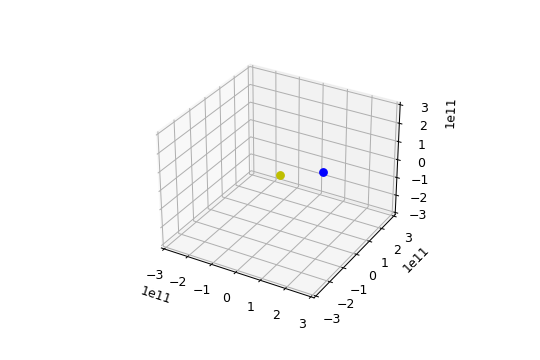

In [42]:
%matplotlib notebook

ani_speed = 1000

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
line0, = ax.plot(pos_list[0,0,0], pos_list[0,1,0], pos_list[0,2,0], 'yo')
line1, = ax.plot(pos_list[0,0,1], pos_list[0,1,1], pos_list[0,2,1], 'bo')
line2, = ax.plot(pos_list[0,0,2], pos_list[0,1,2], pos_list[0,2,2], 'ko')
ax.set_ylim(-3e11, 3e11)
ax.set_xlim(-3e11, 3e11)
ax.set_zlim(-3e11, 3e11)

def update(i):
    line0.set_data(pos_list[ani_speed*i,0, 0], pos_list[ani_speed*i,1, 0])    
    line0.set_3d_properties(pos_list[ani_speed*i,2, 0]) 
    line1.set_data(pos_list[ani_speed*i,0, 1], pos_list[ani_speed*i,1, 1])    
    line1.set_3d_properties(pos_list[ani_speed*i,2, 1]) 
    line2.set_data(pos_list[ani_speed*i,0, 2], pos_list[ani_speed*i,1, 2])    
    line2.set_3d_properties(pos_list[ani_speed*i,2, 2]) 
    #return line,

ani = animation.FuncAnimation(fig, update, interval=1)
plt.show()

In [43]:
### calculate expected perihelion ###
per_exp = l_ell**2/(G*Ms*Me*mu*(1+ecc))
print("Calculated perihelion with no asteroid (m): " + str("{:e}".format(per_exp)))

### simulated perihelion ###
per_sim = np.amin(np.sqrt((pos_list[:,0, 1]-pos_list[:,0, 0])**2 + (pos_list[:,1, 1]-pos_list[:,1, 0])**2))
print("Simulated perihelion with asteroid (m): " + str("{:e}".format(per_sim)))

print("Perihelion change (%): " + str(100*(per_sim-per_exp)/per_exp))

ap_sim = np.amax(np.sqrt((pos_list[:,0, 1]-pos_list[:,0, 0])**2 + (pos_list[:,1, 1]-pos_list[:,1, 0])**2))
print("Simulated aphelion with asteroid (m): " + str("{:e}".format(per_sim)))

print("Aphelion change (%): " + str(100*(ap_sim-r_ap)/r_ap))

Calculated perihelion with no asteroid (m): 1.471033e+11
Simulated perihelion with asteroid (m): 1.471034e+11
Perihelion change (%): 5.179324243438054e-05
Simulated aphelion with asteroid (m): 1.471034e+11
Aphelion change (%): 1.1319171893586428


In [45]:
min_dist = np.amin(np.sqrt((pos_list[:,0, 2]-pos_list[:,0, 1])**2 + (pos_list[:,1, 2]-pos_list[:,1, 1])**2))
print("Closest approach of asteroid to earth (m): " + str("{:e}".format(min_dist)))

Closest approach of asteroid to earth (m): 2.689293e+08
